101
125
30
256


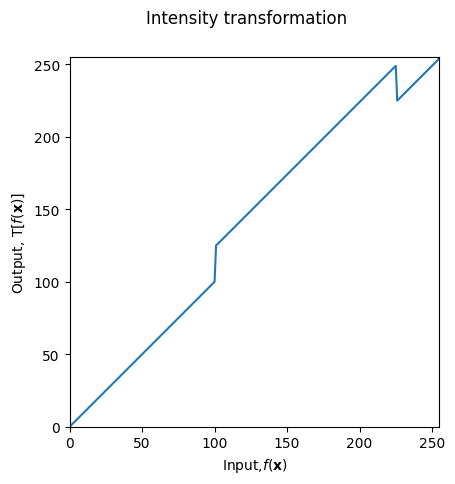

<function destroyAllWindows>

In [2]:
%matplotlib inline
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

#Intensity Transformation
t1 = np.linspace(0,100,101).astype('uint8')
print(len(t1))
t2 = np.linspace(125,249,125).astype('uint8')
print(len(t2))
t3 = np.linspace(225, 255, 30).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T} [f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
fig.suptitle("Intensity transformation")
plt.show()

#Displaying Original Image
img_orig = cv.imread('natasha_grayscale.jpg',cv.IMREAD_GRAYSCALE)
cv.namedWindow("Images", cv.WINDOW_AUTOSIZE)
cv.imshow("Images",img_orig)
cv.waitKey(0)

#Diplaying Transformed Image
img_transformed = cv.LUT(img_orig,transform)
cv.imshow("Images",img_transformed)
cv.waitKey(0)
cv.destroyAllWindows





